In [1]:
import sys
sys.path.insert(0, '../')
from gw_tools.gw_plot import gw_plot

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression

In [2]:
## Load data
with open('../data/pickled_data/AEK201_short.pkl', 'rb') as f:
    df = pickle.load(f)

## Grab desired columns
df = df[['date', 'avg_well_depth', 'gage_ht', 'discharge_cfs', 'prcp',
             'temp_avg', 'temp_max', 'temp_min', 'hPa_avg', 'hum_avg', 
             'wind_avg', 'gust_avg']]

## Pop off date_time information
date_time = pd.to_datetime(df.pop('date'), format='%d.%m.%Y %H:%M:%S')

## Add _time of year_ signal
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['year_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['year_cos'] = np.cos(timestamp_s * (2 * np.pi / year))

## Set aside a year of holdout data
date_time_holdout = date_time[-365:].copy()
df_holdout = df[-365:].copy()

## Make the training data the standard
date_time = date_time[:-365].copy()
df = df[:-365].copy()

## Grab some practice data for demonstration
TEST_SIZE = 365
data_train = df[:-TEST_SIZE].copy()
data_test = df[-TEST_SIZE:].copy()

## Pediction the Average Model
## Predict the future using the mean of the training data
pred = np.ones(len(data_test))*data_train.avg_well_depth.mean()

## Linear Regression Model
## Create an instance of the LinearRegression class
linear = LinearRegression(copy_X=True)

## Define the training data
X_train = data_train.drop('avg_well_depth', axis=1).values
y_train = data_train.avg_well_depth.values

## Fit the model to the training data
linear.fit(X_train, y_train)

## Make predictions on the test data
X_test = data_test.drop('avg_well_depth', axis=1).values
pred_lin = linear.predict(X_test)

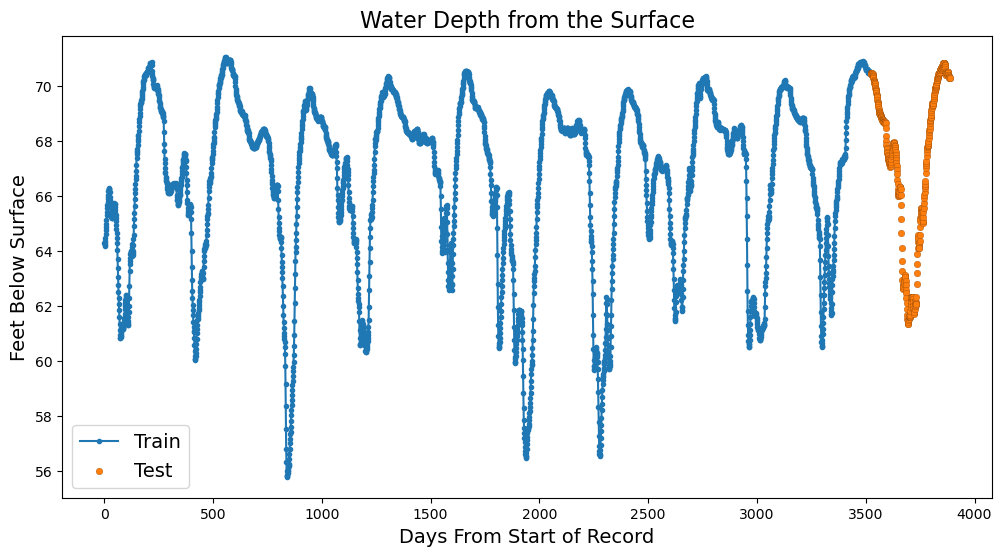

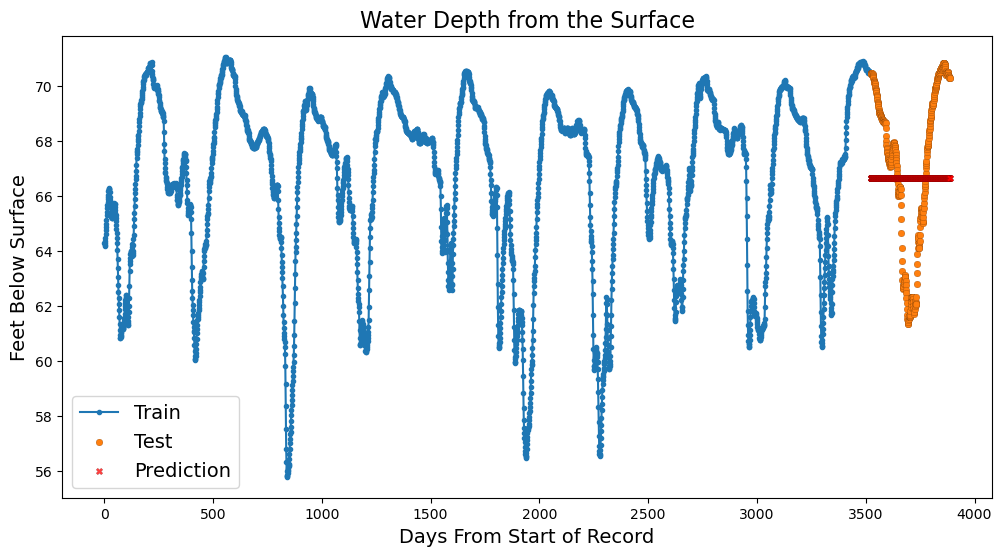

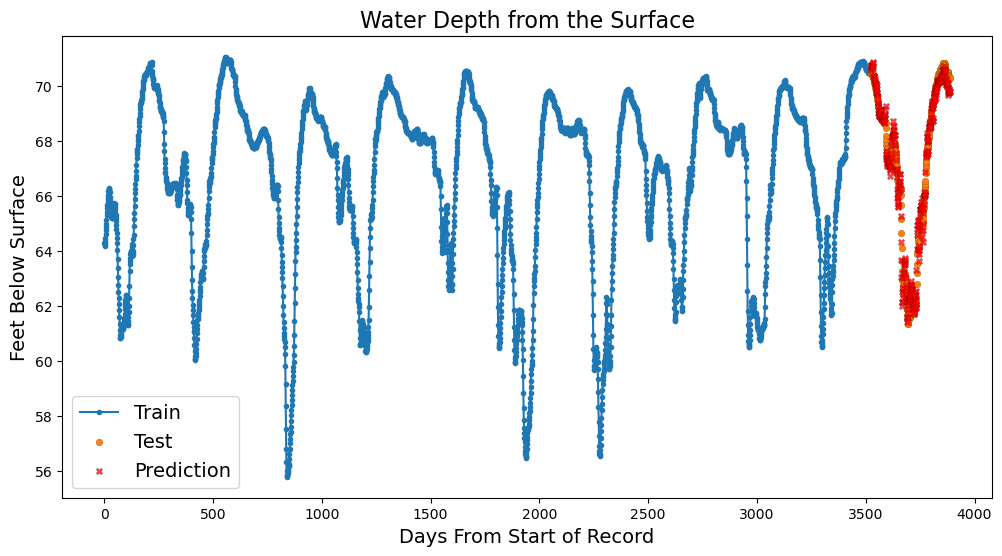

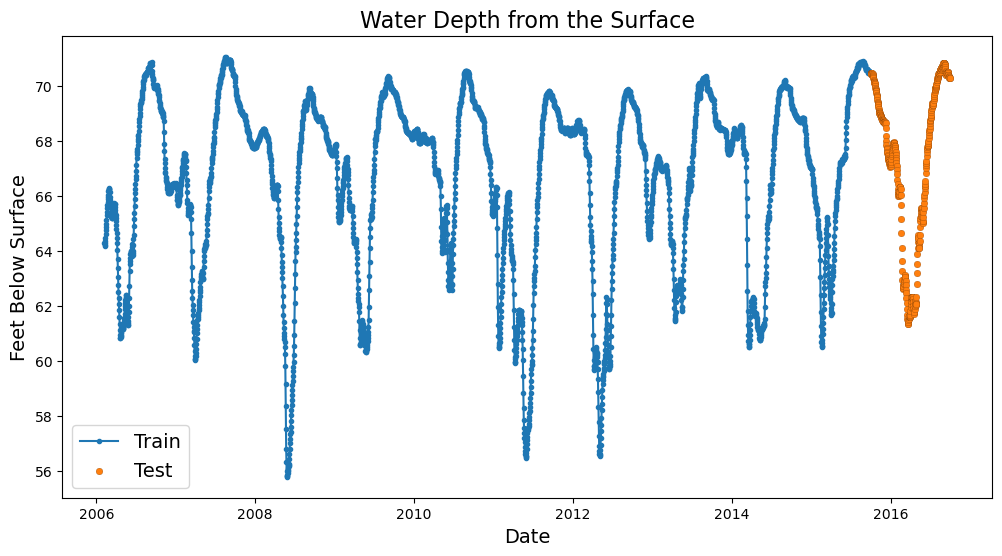

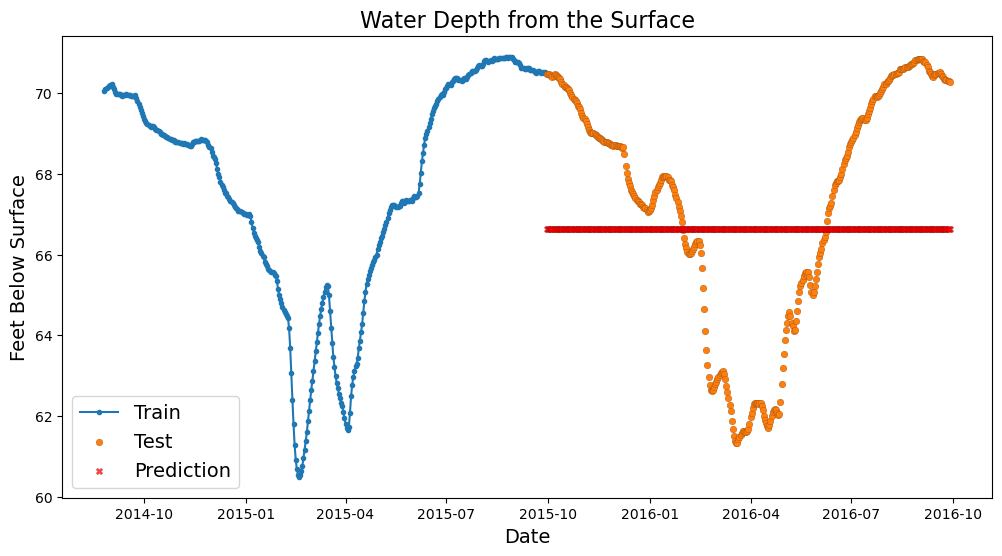

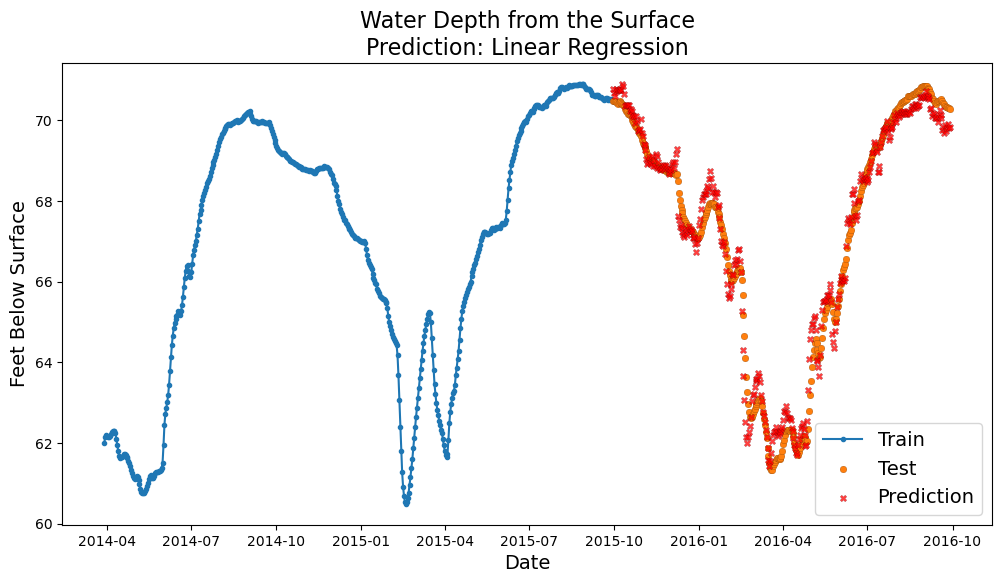

In [3]:
train = data_train.avg_well_depth.values
test = data_test.avg_well_depth.values
dates = date_time
start_date = datetime.datetime(2006,2,7)

gw_plot(train=train, test=test)
gw_plot(train=train, test=test, pred=pred)
gw_plot(train=train, test=test, pred=pred_lin)
gw_plot(train=train, test=test, start_date=start_date)
gw_plot(train=train, test=test, pred=pred, train_limit=400, dates=dates)
gw_plot(train=train, test=test, pred=pred_lin, train_limit=550, start_date=start_date, model='Prediction: Linear Regression')